In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load task weights
with open('../utils/tasks_weights.json', 'r') as f:
    task_weights = json.load(f)

# get a list of all models with their paths
results_dir = Path('../results/qdrant')

models = []
for company_dir in results_dir.iterdir():
    if company_dir.name == 'qdrant':  # Skip qdrant folder
        continue
    for model_dir in company_dir.iterdir():
        models.append(model_dir)

models # [PosixPath('../results/qdrant/BAAI/bge-small-en-v1.5')]

[PosixPath('../results/qdrant/BAAI/bge-small-en-v1.5')]

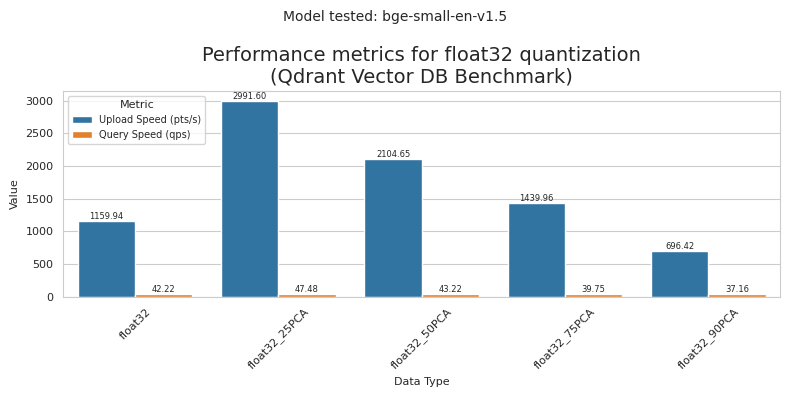

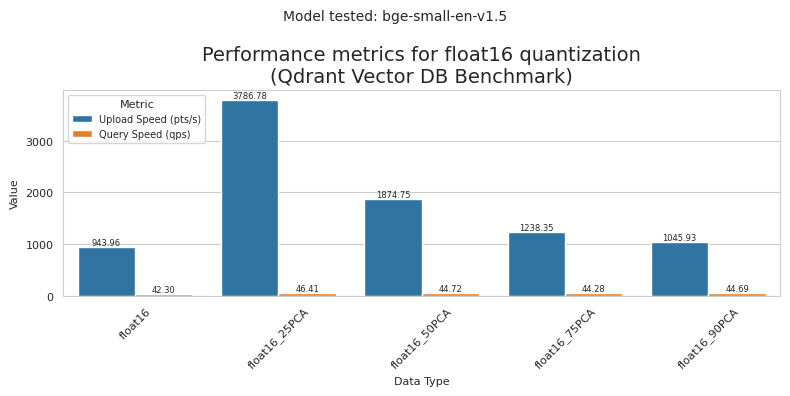

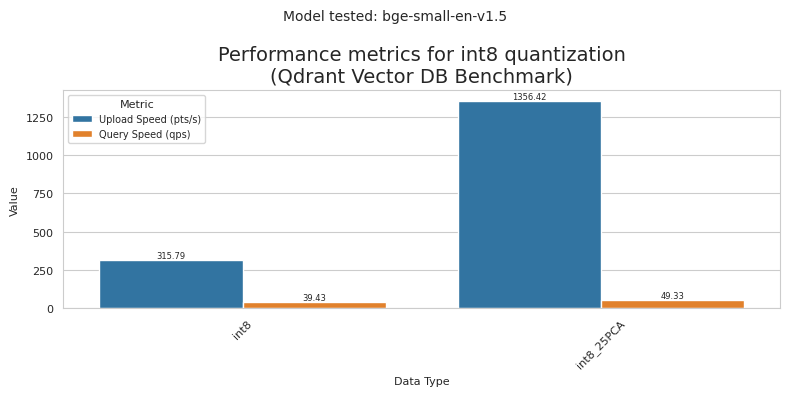

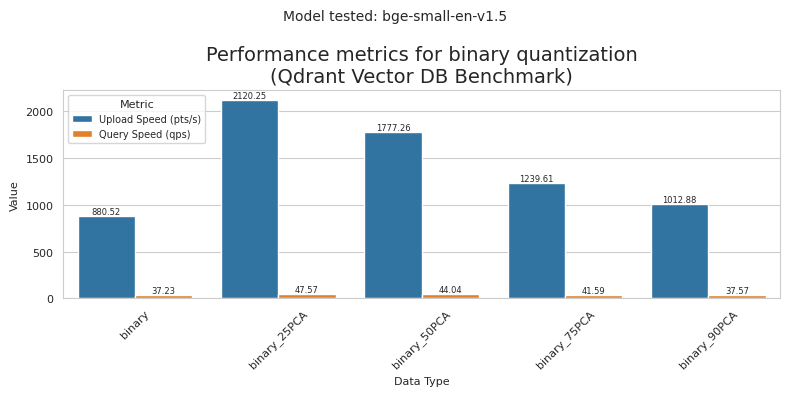

In [4]:
for model_path in models:
    # Get all result files for this model
    result_files = list(model_path.glob('results_*.json'))

    # Group files by base data type
    dtype_groups = {
        'float32': [],
        'float16': [],
        'int8': [],
        'binary': []
    }

    for result_file in result_files:
        dtype = result_file.stem.replace('results_', '')
        # Match files to their base type
        for base_type in dtype_groups.keys():
            if base_type in dtype:
                dtype_groups[base_type].append(result_file)

    for base_type, files in dtype_groups.items():
        if not files:
            continue
            
        dtypes = []
        metrics = []
        values = []
        
        for result_file in files:
            dtype = result_file.stem.replace('results_', '')
            with open(result_file, 'r') as f:
                data = json.load(f)
                
            # Extract key metrics
            dtypes.extend([dtype] * 2)
            metrics.extend(['Upload Speed (pts/s)', 'Query Speed (qps)'])
            values.extend([
                data['points_per_second'],
                data['queries_per_second']
            ])

        df = pd.DataFrame({
            'dtype': dtypes,
            'metric': metrics,
            'value': values
        })

        # Create individual plot
        plt.figure(figsize=(8, 4))
        sns.set_style("whitegrid")
        ax = plt.gca()
        sns.barplot(data=df, x='dtype', y='value', hue='metric', 
                   order=sorted(df['dtype'].unique()), ax=ax)
        
        plt.title(f'Performance metrics for {base_type} quantization\n(Qdrant Vector DB Benchmark)', fontsize=14)
        plt.suptitle(f'Model tested: {model_path.name}', fontsize=10)

        plt.xlabel('Data Type', fontsize=8)
        plt.ylabel('Value', fontsize=8)
        
        # Add legend in bottom left corner
        plt.legend(title='Metric', loc='upper left', fontsize=7, title_fontsize=8)
        
        # Add value labels
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', fontsize=6)

        # Make tick labels smaller
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)

        plt.tight_layout()
        plt.show()

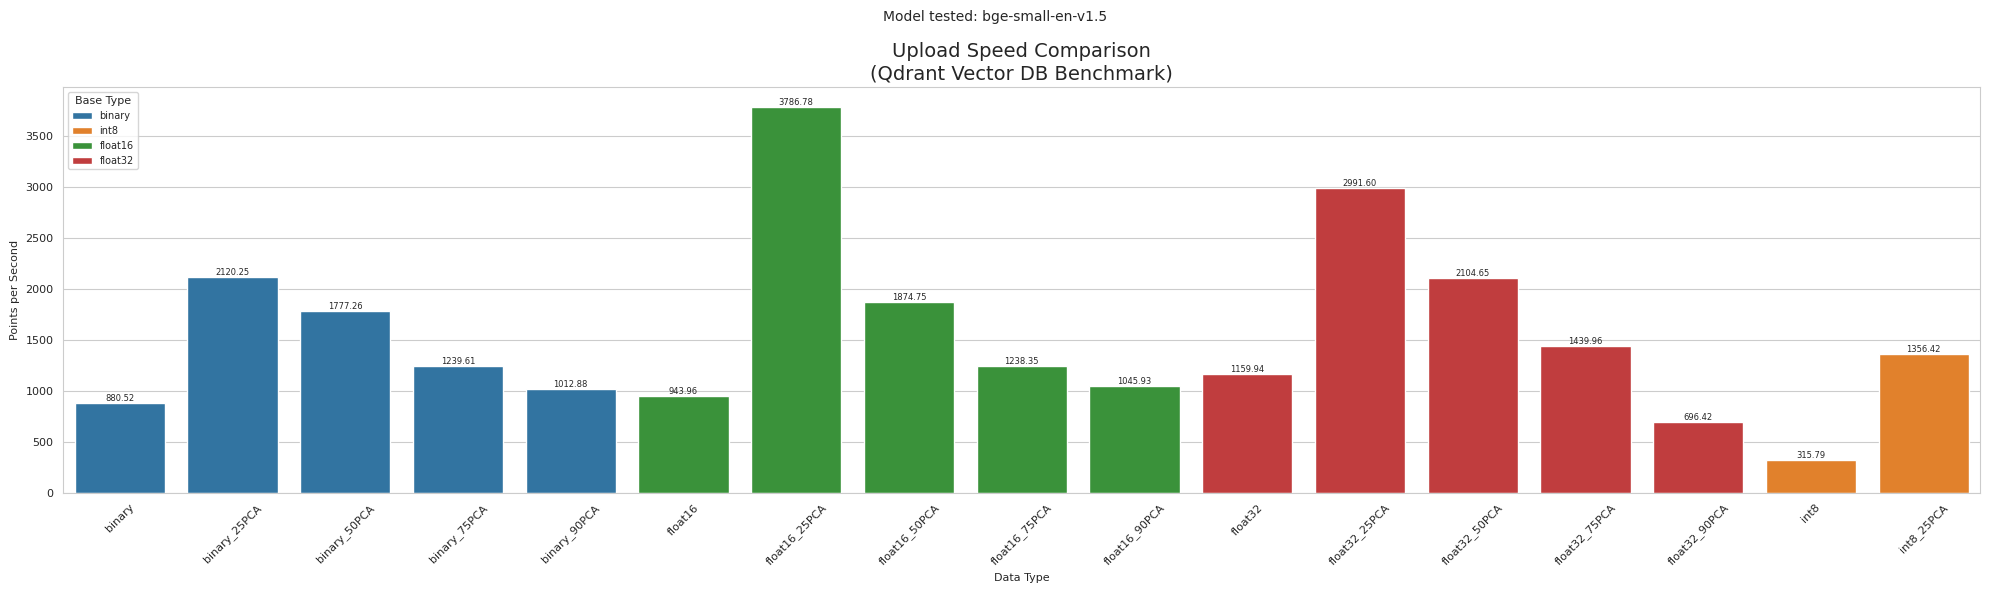

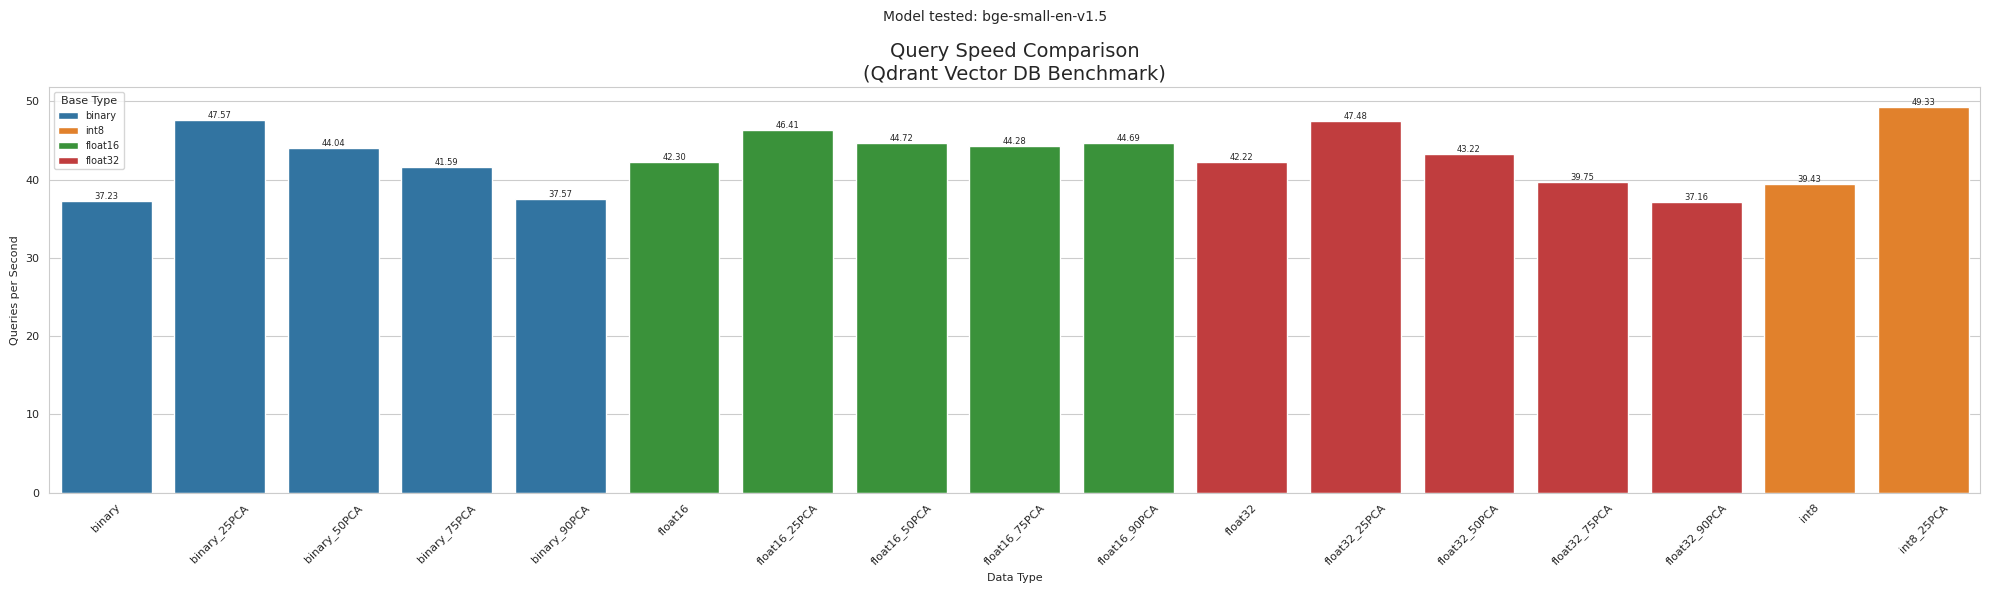

In [7]:
# Get all result files from the Qdrant experiment directory
results_dir = Path('../results/qdrant')
model_paths = list(results_dir.glob('*/*'))

for model_path in model_paths:
    # Get all result files for this model
    result_files = list(model_path.glob('results_*.json'))

    # Group files by base data type
    dtype_groups = {
        'float32': [],
        'float16': [],
        'int8': [],
        'binary': []
    }

    for result_file in result_files:
        dtype = result_file.stem.replace('results_', '')
        # Match files to their base type
        for base_type in dtype_groups.keys():
            if base_type in dtype:
                dtype_groups[base_type].append(result_file)

    # Prepare data
    dtypes = []
    upload_speeds = []
    query_speeds = []
    base_types = []

    for result_file in result_files:
        dtype = result_file.stem.replace('results_', '')
        # Match files to their base type
        for base_type in dtype_groups.keys():
            if base_type in dtype:
                with open(result_file, 'r') as f:
                    data = json.load(f)
                    
                dtypes.append(dtype)
                upload_speeds.append(data['points_per_second'])
                query_speeds.append(data['queries_per_second'])
                base_types.append(base_type)

    # Upload speed plot
    plt.figure(figsize=(20, 6))
    sns.set_style("whitegrid")
    df_upload = pd.DataFrame({
        'dtype': dtypes,
        'value': upload_speeds,
        'base_type': base_types
    })

    ax = plt.gca()
    sns.barplot(data=df_upload, x='dtype', y='value', hue='base_type',
                order=sorted(df_upload['dtype'].unique()), ax=ax)
    plt.title(f'Upload Speed Comparison\n(Qdrant Vector DB Benchmark)', fontsize=14)
    plt.suptitle(f'Model tested: {model_path.name}', fontsize=10)
    plt.xlabel('Data Type', fontsize=8)
    plt.ylabel('Points per Second', fontsize=8)
    plt.legend(title='Base Type', loc='upper left', fontsize=7, title_fontsize=8)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=6)
    plt.tight_layout()
    plt.show()

    # Query speed plot  
    plt.figure(figsize=(20, 6))
    sns.set_style("whitegrid")
    df_query = pd.DataFrame({
        'dtype': dtypes,
        'value': query_speeds,
        'base_type': base_types
    })

    ax = plt.gca()
    sns.barplot(data=df_query, x='dtype', y='value', hue='base_type',
                order=sorted(df_query['dtype'].unique()), ax=ax)
    plt.title(f'Query Speed Comparison\n(Qdrant Vector DB Benchmark)', fontsize=14)
    plt.suptitle(f'Model tested: {model_path.name}', fontsize=10)
    plt.xlabel('Data Type', fontsize=8)
    plt.ylabel('Queries per Second', fontsize=8)
    plt.legend(title='Base Type', loc='upper left', fontsize=7, title_fontsize=8)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=6)
    plt.tight_layout()
    plt.show()


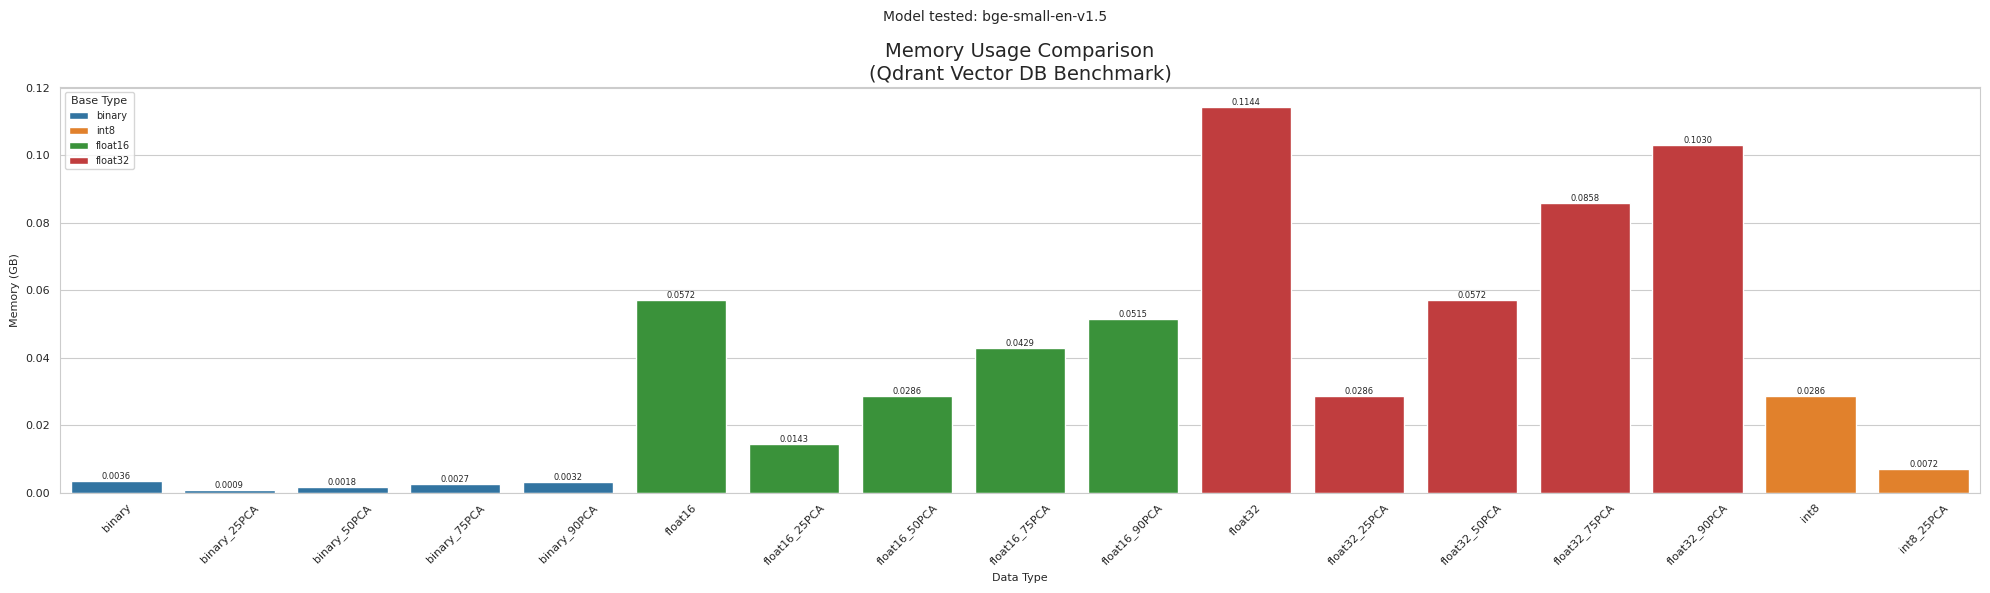

In [8]:
for model_path in models:
    # Get all result files for this model
    result_files = list(model_path.glob('results_*.json'))

    # Group files by base data type
    dtype_groups = {
        'float32': [],
        'float16': [],
        'int8': [],
        'binary': []
    }

    # Prepare data
    dtypes = []
    values = []
    base_types = []

    for result_file in result_files:
        dtype = result_file.stem.replace('results_', '')
        # Match files to their base type
        for base_type in dtype_groups.keys():
            if base_type in dtype:
                with open(result_file, 'r') as f:
                    data = json.load(f)
                    
                # Extract memory metric
                dtypes.append(dtype)
                values.append(data['theoretical_memory_gb'])
                base_types.append(base_type)

    df = pd.DataFrame({
        'dtype': dtypes,
        'value': values,
        'base_type': base_types
    })

    # Create wide plot
    plt.figure(figsize=(20, 6))
    sns.set_style("whitegrid")
    ax = plt.gca()

    # Create bar plot with colors by base type
    sns.barplot(data=df, x='dtype', y='value', hue='base_type',
                order=sorted(df['dtype'].unique()), ax=ax)

    plt.title(f'Memory Usage Comparison\n(Qdrant Vector DB Benchmark)', fontsize=14)
    plt.suptitle(f'Model tested: {model_path.name}', fontsize=10)
    plt.xlabel('Data Type', fontsize=8)
    plt.ylabel('Memory (GB)', fontsize=8)
    plt.legend(title='Base Type', loc='upper left', fontsize=7, title_fontsize=8)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', fontsize=6)

    plt.tight_layout()
    plt.show()


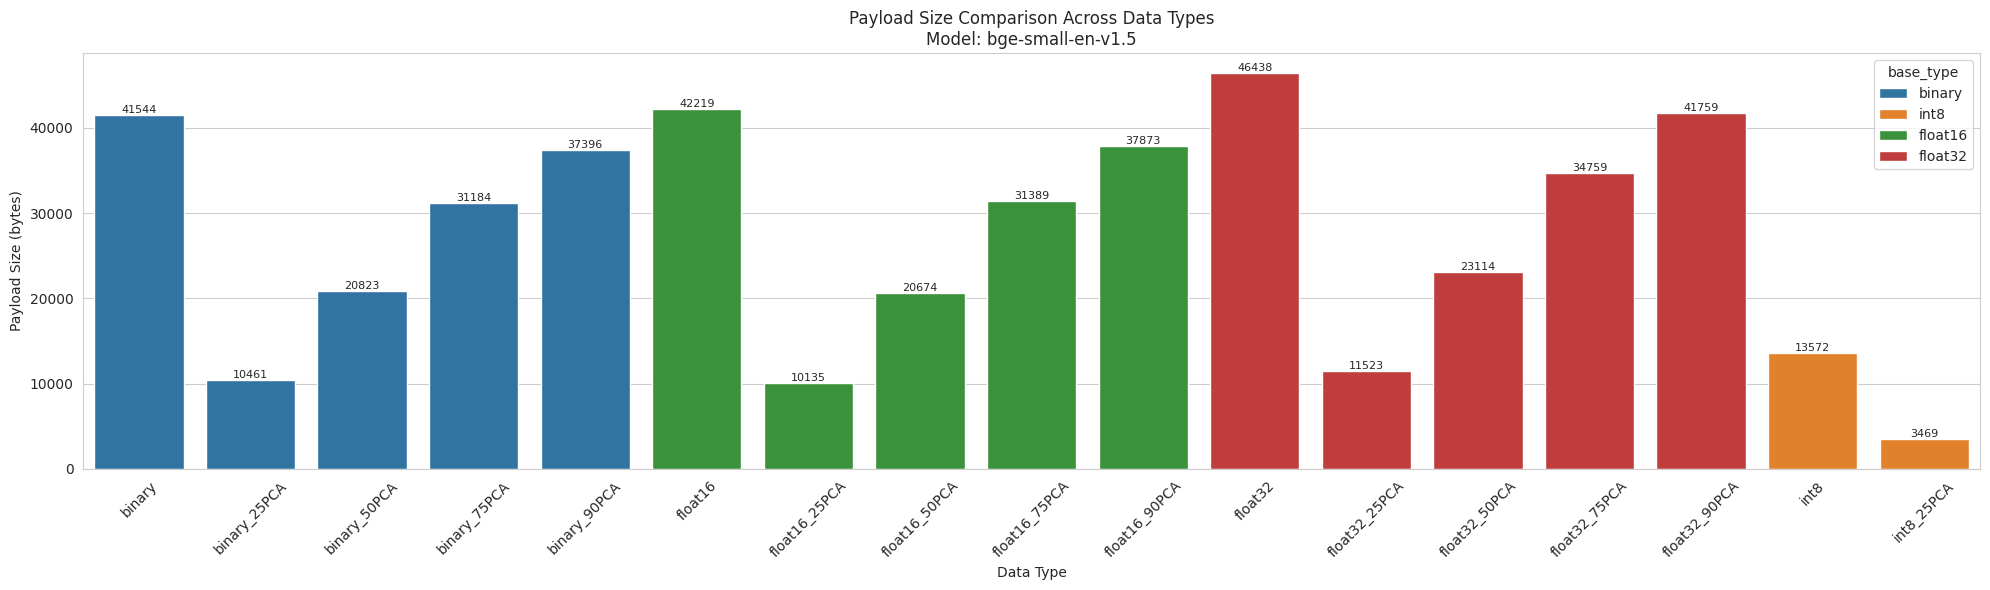

In [11]:
# Iterate through models
for model_path in models:
    # Prepare data for payload size
    dtypes = []
    payload_sizes = []
    base_types = []

    # Get result files for this model
    result_files = list(model_path.glob('results_*.json'))

    # First get baseline payload size from float32
    with open(next(f for f in result_files if 'float32' in f.name), 'r') as f:
        baseline_size = json.load(f)['avg_payload_size_bytes']

    for result_file in result_files:
        dtype = result_file.stem.replace('results_', '')
        # Match files to their base type
        for base_type in dtype_groups.keys():
            if base_type in dtype:
                with open(result_file, 'r') as f:
                    data = json.load(f)
                    
                # Extract payload size metric
                dtypes.append(dtype)
                payload_sizes.append(data['avg_payload_size_bytes'])
                base_types.append(base_type)

    df_size = pd.DataFrame({
        'dtype': dtypes,
        'avg_payload_size_bytes': payload_sizes,
        'base_type': base_types
    })

    # Create figure
    plt.figure(figsize=(20, 6))
    sns.set_style("whitegrid")

    # Absolute payload size plot
    ax = sns.barplot(data=df_size, x='dtype', y='avg_payload_size_bytes', hue='base_type',
                order=sorted(df_size['dtype'].unique()))
    plt.title(f'Payload Size Comparison Across Data Types\nModel: {model_path.name}')
    plt.xlabel('Data Type')
    plt.ylabel('Payload Size (bytes)')
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontsize=8)

    plt.tight_layout()
    plt.show()
